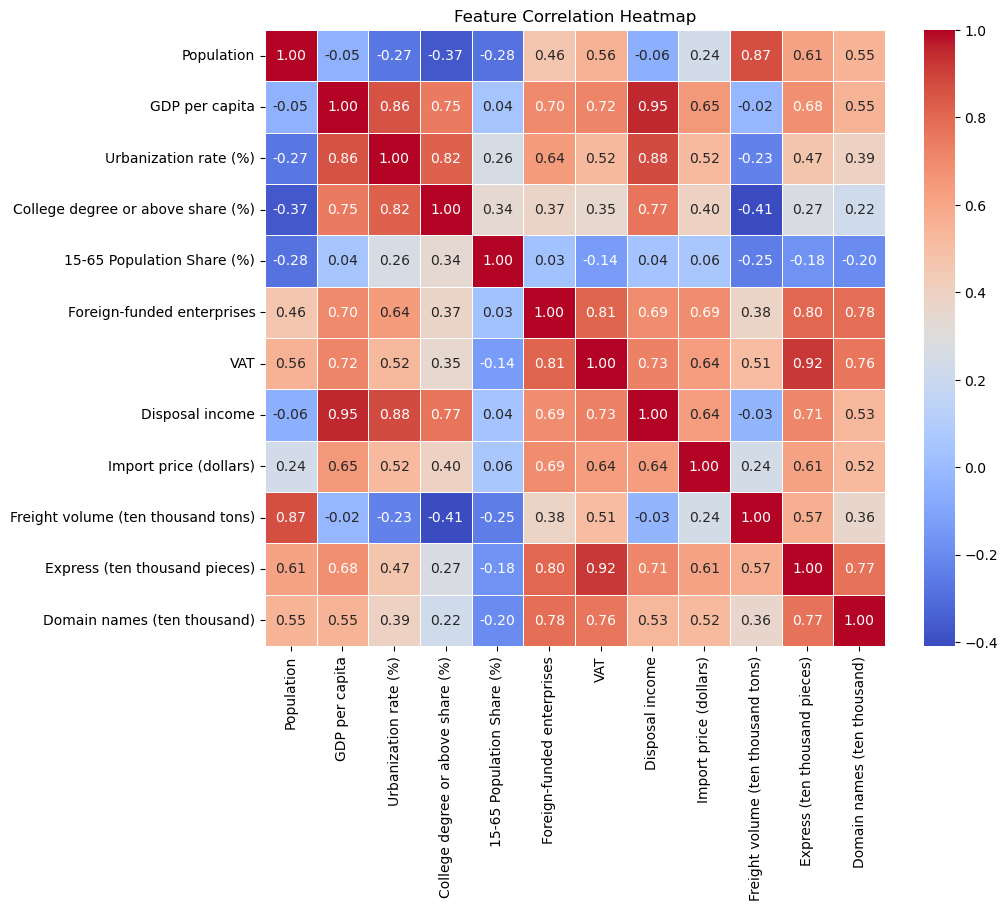

In [92]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 📌 Load dataset
# -------------------------------
file_path = "Regression_dollars.xlsx"
df = pd.read_excel(file_path)

# 📌 Drop rows with missing target variable
df = df.dropna(subset=["Import price (dollars)"])

# 📌 Drop 'Area' and 'Year' (not used in regression)
df = df.drop(columns=["Area", "Year"])

# 📌 Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors="coerce")

# 📌 Standardize all numerical features using Z-score normalization
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(["Import price (dollars)"])
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 📌 Remove rows where `log(Import_price(dollars)) == 0`
df = df[df["Import price (dollars)"] > 0]

# -------------------------------
# 📌 Generate Correlation Heatmap
# -------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [61]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 📌 Select independent variables (exclude target variable)
X = df.drop(columns=["log(Import_price(dollars))"])

# 📌 Add a constant column for intercept (required for VIF calculation)
X = sm.add_constant(X)

# 📌 Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# 📌 Print VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

                                    Feature        VIF
8                      log(Disposal_income)  30.878673
1                           log(Population)  22.502718
10    log(Express (in ten thousand pieces))  19.164865
2                       log(GDP_Per_Capita)  12.590216
3                     Urbanization_Rate (%)  12.557541
7                                  log(VAT)  10.004169
6           log(Foreign-funded_enterprises)   9.298899
4               College_degree_or_above (%)   7.279136
9   log(Freight_volume (ten thousand tons))   6.621751
11      log(Domain_names (in ten thousand))   4.222585
0                                     const   2.899490
5                15-65_Population_Share (%)   1.632947


Regression Summary:
                                OLS Regression Results                                
Dep. Variable:     log(Import_price(dollars))   R-squared:                       0.573
Model:                                    OLS   Adj. R-squared:                  0.553
Method:                         Least Squares   F-statistic:                     28.50
Date:                        Thu, 13 Mar 2025   Prob (F-statistic):           2.29e-37
Time:                                17:54:56   Log-Likelihood:                -329.23
No. Observations:                         246   AIC:                             682.5
Df Residuals:                             234   BIC:                             724.5
Df Model:                                  11                                         
Covariance Type:                    nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--

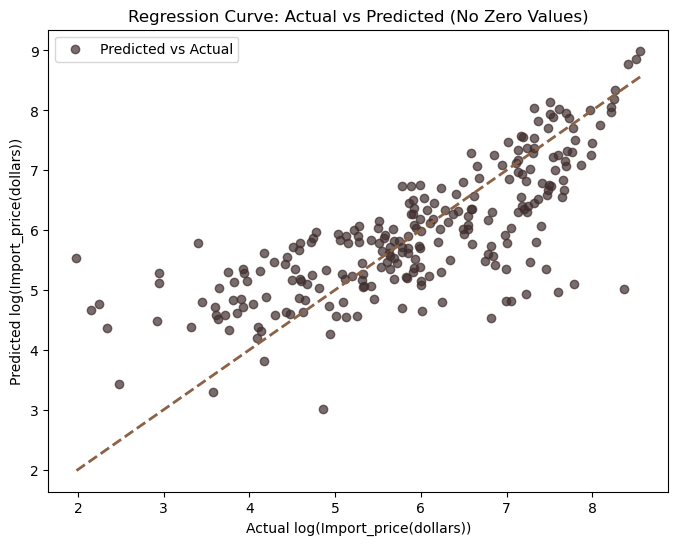

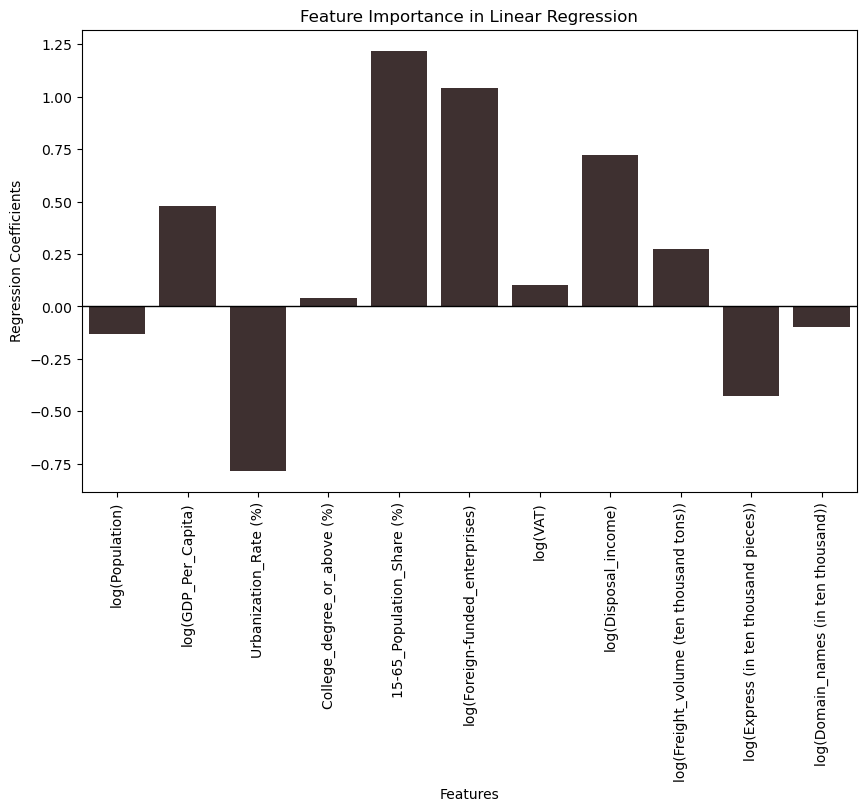

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "Regression_dollars.xlsx"
df = pd.read_excel(file_path)

# Drop rows with missing target variable
df = df.dropna(subset=["log(Import_price(dollars))"])

# Drop 'Area' and 'Year'
df = df.drop(columns=["Area", "Year"])

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Standardize all numerical features using Z-score normalization
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(["log(Import_price(dollars))"])
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Remove rows where `log(Import_price(dollars)) == 0`
df = df[df["log(Import_price(dollars))"] > 0]

# Define target and features
y = df["log(Import_price(dollars))"]
X = df.drop(columns=["log(Import_price(dollars))"])

# Ensure all features are numeric
assert X.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all(), "Some features are not numeric!"

# Add constant term for the intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print("Regression Summary:")
print(model.summary())

# Compute Mean Squared Error (MSE)
mse = np.mean(model.resid ** 2)
print(f"\nMean Squared Error (MSE): {mse:.4f}")

# Extract significant variables (p-value < 0.05)
significant_vars = model.pvalues[model.pvalues < 0.05]
print("\nSignificant Variables (p < 0.05):")
print(significant_vars)

# -------------------------------
# Plot Regression Curve (Actual vs Predicted)
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y, model.fittedvalues, alpha=0.7, color="#402E2E", label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="#8B6246", linestyle="dashed", linewidth=2)  # Ideal line
plt.xlabel("Actual log(Import_price(dollars))")
plt.ylabel("Predicted log(Import_price(dollars))")
plt.title("Regression Curve: Actual vs Predicted (No Zero Values)")
plt.legend()
plt.show()

# -------------------------------
# Plot Feature Importance (Ignore Constant)
# -------------------------------
coeffs = model.params.drop("const")  # Ignore constant term

plt.figure(figsize=(10, 6))
sns.barplot(x=coeffs.index, y=coeffs.values, color="#402E2E")
plt.axhline(0, color="black", linewidth=1)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Regression Coefficients")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "Regression_dollars.xlsx"
df = pd.read_excel(file_path)

# Drop rows with missing target variable
df = df.dropna(subset=["log(Import_price(dollars))"])

# Drop 'Area' and 'Year'
df = df.drop(columns=["Area", "Year"])

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Standardize all numerical features using Z-score normalization
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(["log(Import_price(dollars))"])
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Remove rows where `log(Import_price(dollars)) == 0`
df = df[df["log(Import_price(dollars))"] > 0]

# Define target and features
y = df["log(Import_price(dollars))"]
X = df.drop(columns=["log(Import_price(dollars))"])

# Ensure all features are numeric
assert X.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all(), "Some features are not numeric!"

# Add constant term for the intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print("Regression Summary:")
print(model.summary())

# Compute Mean Squared Error (MSE)
mse = np.mean(model.resid ** 2)
print(f"\nMean Squared Error (MSE): {mse:.4f}")

# Extract significant variables (p-value < 0.05)
significant_vars = model.pvalues[model.pvalues < 0.05]
print("\nSignificant Variables (p < 0.05):")
print(significant_vars)

# -------------------------------
# Plot Regression Curve (Actual vs Predicted)
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y, model.fittedvalues, alpha=0.7, color="#402E2E", label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="#8B6246", linestyle="dashed", linewidth=2)  # Ideal line
plt.xlabel("Actual log(Import_price(dollars))")
plt.ylabel("Predicted log(Import_price(dollars))")
plt.title("Regression Curve: Actual vs Predicted (No Zero Values)")
plt.legend()
plt.show()

# -------------------------------
# Plot Feature Importance (Ignore Constant)
# -------------------------------
coeffs = model.params.drop("const")  # Ignore constant term

plt.figure(figsize=(10, 6))
sns.barplot(x=coeffs.index, y=coeffs.values, color="#402E2E")
plt.axhline(0, color="black", linewidth=1)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Regression Coefficients")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [60]:
for col in df.columns:
    print(col)

log(Population)
log(GDP_Per_Capita)
Urbanization_Rate (%)
College_degree_or_above (%)
15-65_Population_Share (%)
log(Foreign-funded_enterprises)
log(VAT)
log(Disposal_income)
log(Import_price(dollars))
log(Freight_volume (ten thousand tons))
log(Express (in ten thousand pieces))
log(Domain_names (in ten thousand))


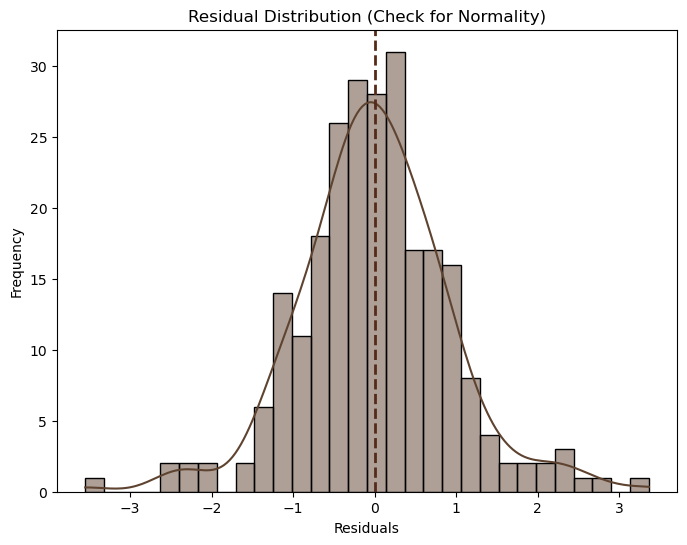

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load dataset
file_path = "Regression_dollars.xlsx"
df = pd.read_excel(file_path)

# Drop rows with missing target variable
df = df.dropna(subset=["log(Import_price(dollars))"])

# Drop 'Area' and 'Year'
df = df.drop(columns=["Area", "Year"])

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Remove rows where `log(Import_price(dollars)) == 0`
df = df[df["log(Import_price(dollars))"] > 0]

# Define target and features
y = df["log(Import_price(dollars))"]
X = df.drop(columns=["log(Import_price(dollars))"])

# Add constant term for the intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Compute Residuals
residuals = model.resid


# -------------------------------
# Histogram of Residuals (Check Normality)
# -------------------------------
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="#5E4330")
plt.axvline(0, color="#552A19", linestyle="dashed", linewidth=2)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Check for Normality)")
plt.show()

Best Alpha (λ) for Lasso: 0.0625

Mean Squared Error (MSE): 0.9316

Selected Features (Non-Zero Coefficients):
log(GDP_Per_Capita)                        0.403155
log(Foreign-funded_enterprises)            0.597225
log(VAT)                                   0.063979
log(Disposal_income)                       0.079146
log(Freight_volume (ten thousand tons))    0.075689
dtype: float64


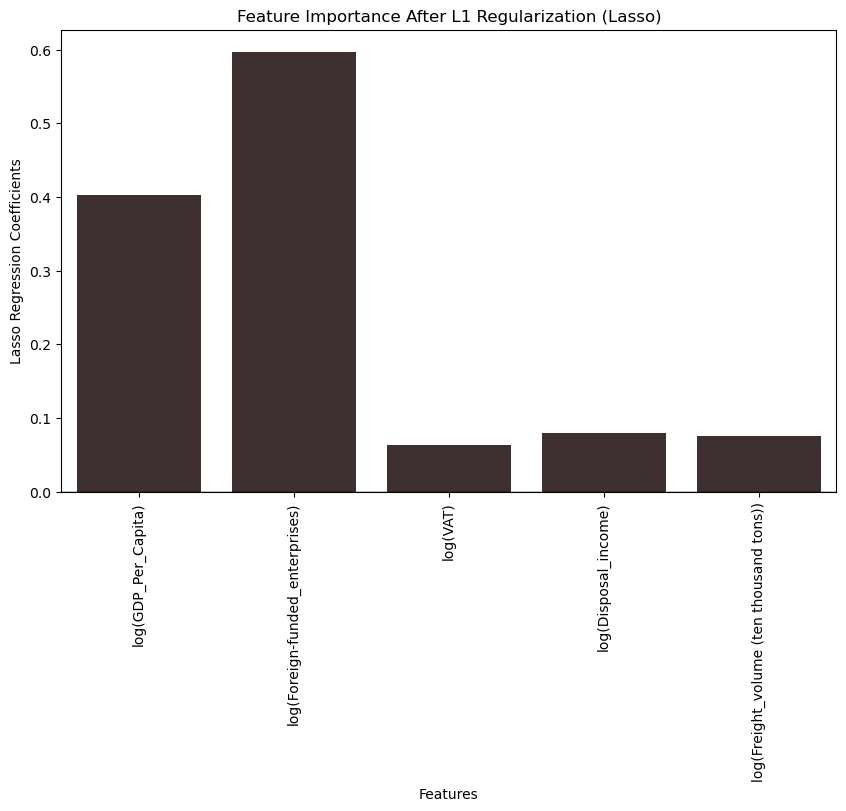

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV  # 📌 L1 Regularization
from sklearn.metrics import mean_squared_error

# -------------------------------
# 📌 Load dataset
# -------------------------------
file_path = "Regression_dollars.xlsx"
df = pd.read_excel(file_path)

# 📌 Drop rows with missing target variable
df = df.dropna(subset=["log(Import_price(dollars))"])

# 📌 Drop 'Area' and 'Year'
df = df.drop(columns=["Area", "Year"])

# 📌 Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors="coerce")

# -------------------------------
# 📌 Standardize features
# -------------------------------
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(["log(Import_price(dollars))"])
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 📌 Remove rows where `log(Import_price(dollars)) == 0`
df = df[df["log(Import_price(dollars))"] > 0]

# -------------------------------
# 📌 Define target and features
# -------------------------------
y = df["log(Import_price(dollars))"]
X = df.drop(columns=["log(Import_price(dollars))"])

# -------------------------------
# 📌 Apply Lasso Regression (L1 Regularization)
# -------------------------------
lasso = LassoCV(cv=5, alphas=np.logspace(-3, 1, 50), random_state=42)  # Cross-validation to find best alpha
lasso.fit(X, y)

# 📌 Get best alpha value
best_alpha = lasso.alpha_
print(f"Best Alpha (λ) for Lasso: {best_alpha:.4f}")

# -------------------------------
# 📌 Evaluate Model Performance
# -------------------------------
y_pred = lasso.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.4f}")

# -------------------------------
# 📌 Extract Feature Importance (Non-Zero Coefficients)
# -------------------------------
lasso_coeffs = pd.Series(lasso.coef_, index=X.columns)
selected_features = lasso_coeffs[lasso_coeffs != 0]

print("\nSelected Features (Non-Zero Coefficients):")
print(selected_features)

# -------------------------------
# 📌 Plot Feature Importance
# -------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_features.index, y=selected_features.values, color="#402E2E")
plt.axhline(0, color="black", linewidth=1)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Lasso Regression Coefficients")
plt.title("Feature Importance After L1 Regularization (Lasso)")
plt.show()

Regression Summary:
                              OLS Regression Results                              
Dep. Variable:     Import price (dollars)   R-squared:                       0.502
Model:                                OLS   Adj. R-squared:                  0.494
Method:                     Least Squares   F-statistic:                     60.75
Date:                    Wed, 09 Apr 2025   Prob (F-statistic):           1.98e-35
Time:                            12:43:13   Log-Likelihood:                -348.02
No. Observations:                     246   AIC:                             706.0
Df Residuals:                         241   BIC:                             723.6
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

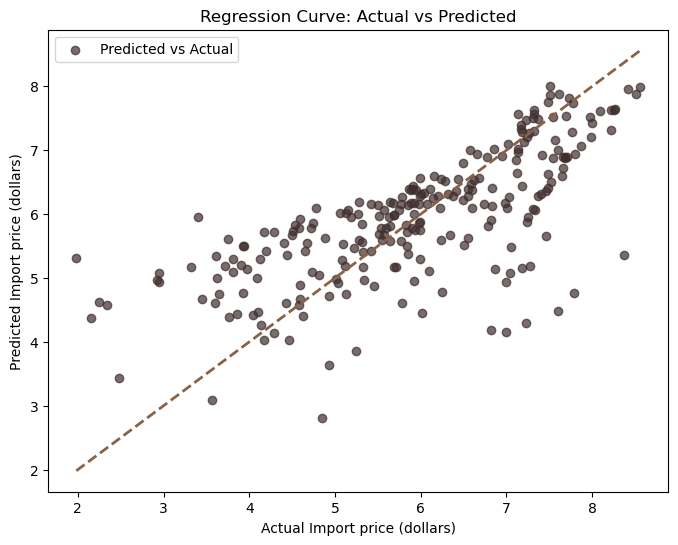

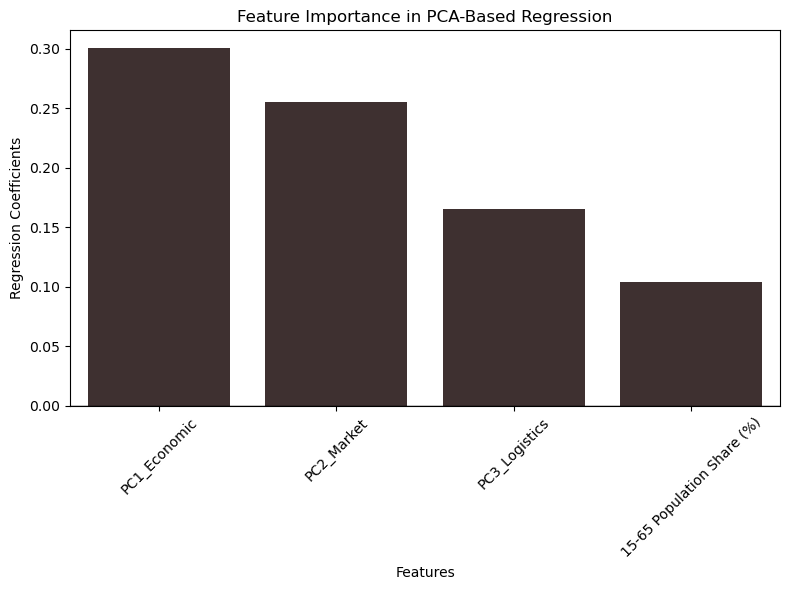

In [97]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -------------------------------
# 1. Load and Clean Data
# -------------------------------
file_path = "Regression_dollars.xlsx"
df = pd.read_excel(file_path)

# Drop rows with missing target variable
df = df.dropna(subset=["Import price (dollars)"])

# Drop 'Area' and 'Year'
df = df.drop(columns=["Area", "Year"])

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Remove rows where `log(Import_price(dollars)) == 0`
df = df[df["Import price (dollars)"] > 0]

# -------------------------------
# 2. Standardize Features
# -------------------------------
target = "Import price (dollars)"
features = df.columns.drop(target)

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# -------------------------------
# 3. PCA for Correlated Groups
# -------------------------------

# Group A: Economic Development
group_a = ["GDP per capita", "Disposal income", "Urbanization rate (%)", "College degree or above share (%)"]
pca_a = PCA(n_components=1)
df["PC1_Economic"] = pca_a.fit_transform(df[group_a])

# Group B: Market Activity
group_b = ["Foreign-funded enterprises", "VAT", "Express (ten thousand pieces)", "Domain names (ten thousand)"]
pca_b = PCA(n_components=1)
df["PC2_Market"] = pca_b.fit_transform(df[group_b])

# Group C: Population & Freight
group_c = ["Population", "Freight volume (ten thousand tons)"]
pca_c = PCA(n_components=1)
df["PC3_Logistics"] = pca_c.fit_transform(df[group_c])

# -------------------------------
# 4. Prepare Final Dataset for Regression
# -------------------------------

# Keep target and ungrouped variables + new PCs
final_features = ["PC1_Economic", "PC2_Market", "PC3_Logistics", "15-65 Population Share (%)"]
X = df[final_features]
y = df[target]

# Add constant
X = sm.add_constant(X)

# -------------------------------
# 5. Linear Regression
# -------------------------------
model = sm.OLS(y, X).fit()

# Print regression summary
print("Regression Summary:")
print(model.summary())

# Compute Mean Squared Error (MSE)
mse = np.mean(model.resid ** 2)
print(f"\nMean Squared Error (MSE): {mse:.4f}")

# Extract significant variables (p-value < 0.05)
significant_vars = model.pvalues[model.pvalues < 0.05]
print("\nSignificant Variables (p < 0.05):")
print(significant_vars)

# -------------------------------
# 6. Plot: Actual vs Predicted
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y, model.fittedvalues, alpha=0.7, color="#402E2E", label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="#8B6246", linestyle="dashed", linewidth=2)
plt.xlabel("Actual Import price (dollars)")
plt.ylabel("Predicted Import price (dollars)")
plt.title("Regression Curve: Actual vs Predicted")
plt.legend()
plt.show()

# -------------------------------
# 7. Plot: Feature Importance
# -------------------------------
coeffs = model.params.drop("const")

plt.figure(figsize=(8, 6))
sns.barplot(x=coeffs.index, y=coeffs.values, color="#402E2E")
plt.axhline(0, color="black", linewidth=1)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Regression Coefficients")
plt.title("Feature Importance in PCA-Based Regression")
plt.tight_layout()
plt.show()

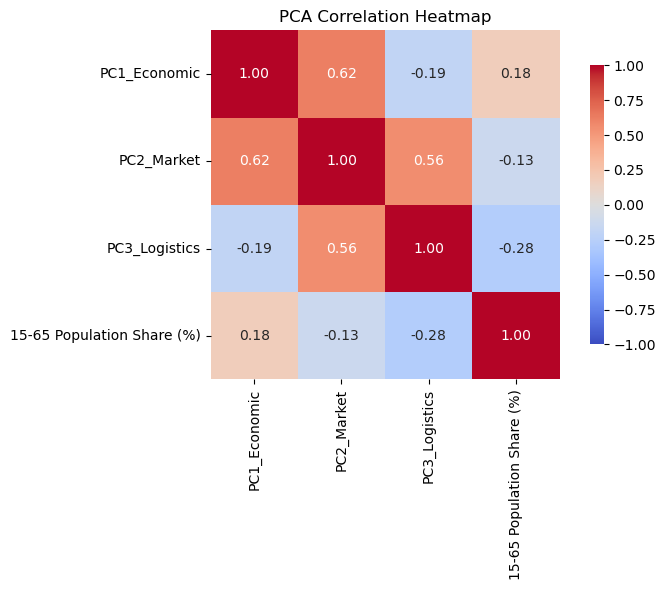

In [98]:
# -------------------------------
# 11. Correlation Map of Final Model Features
# -------------------------------
# 只包括用于回归的特征（含主成分）
correlation_matrix = df[["PC1_Economic", "PC2_Market", "PC3_Logistics", "15-65 Population Share (%)"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, cbar_kws={"shrink": 0.8})
plt.title("PCA Correlation Heatmap")
plt.tight_layout()
plt.show()

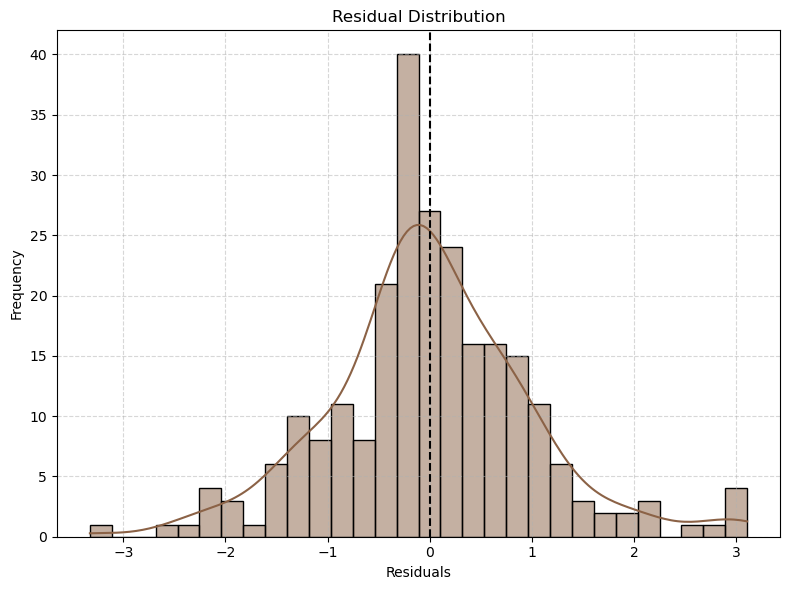

In [100]:
# -------------------------------
# 10. Residual Distribution Plot
# -------------------------------
plt.figure(figsize=(8, 6))
sns.histplot(model.resid, bins=30, kde=True, color="#8B6246")
plt.axvline(0, color="black", linestyle="dashed", linewidth=1.5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

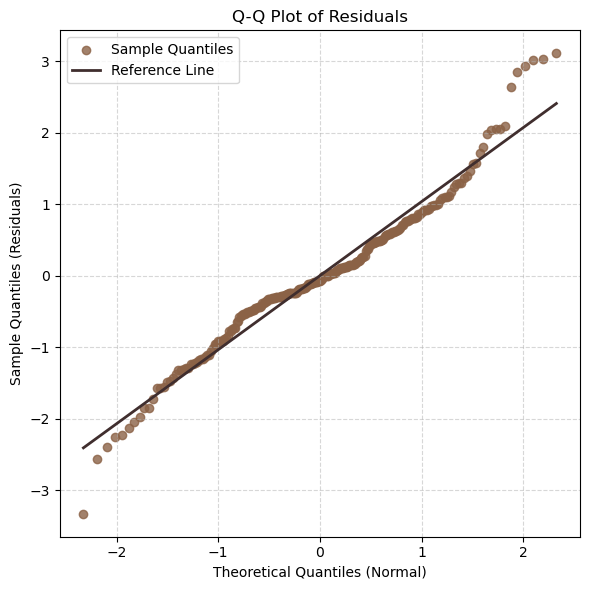

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Get residuals from your model
residuals = model.resid

# Generate theoretical quantiles and ordered residuals
theoretical_quants = np.sort(stats.norm.ppf(np.linspace(0.01, 0.99, len(residuals))))
sample_quants = np.sort(residuals)

# Linear fit line
slope, intercept = np.polyfit(theoretical_quants, sample_quants, 1)
line = slope * theoretical_quants + intercept

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(theoretical_quants, sample_quants, color="#8B6246", alpha=0.8, label="Sample Quantiles")
plt.plot(theoretical_quants, line, color="#402E2E", linewidth=2, label="Reference Line")

plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles (Normal)")
plt.ylabel("Sample Quantiles (Residuals)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()